<a href="https://colab.research.google.com/github/ConnerV42/MachineLearning/blob/master/Assignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this Jupyter Notebook, we are going to be making 2 recurrent neural networks. The first will follow the "SimpleRNN" model schema, while the latter will follow the "LSTM" model schema.

First off, we will create a SimpleRNN model using numpy, just to show the inner functioning of the algoithm.

The part of the RNN that is most significant is the step function which occurs in the for loop as the following line of code: 

```
output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
```

The for loop in the cell below is essentially the recursive element of the RNN coming into play. The quantities computed during the previous iterations of the loop are reused, which grants the network memory, in a sense.

In [1]:
!pip install numpy==1.16.1
import numpy as np

timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))

state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []
for input_t in inputs:
  output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
  successive_outputs.append(output_t)
  state_t = output_t

final_output_sequence = np.concatenate(successive_outputs, axis=0)



In this cell, we are just importing the IMDB movie dataset, to use as training and testing data for both of our Recurrent Neural Networks.

In [2]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

Using TensorFlow backend.


Now, we will begin implementation of the SimpleRNN model using keras. As you can see below, we are using one layer of embeddings and a dense layer for the output. Sometimes, it can be more advantageous to use multiple SimpleRNN layers, in order to increase representational power of a network. Because of this, I added 4 total layers of SimpleRNN in the example below.

In [3]:
from keras.layers import SimpleRNN, Embedding, Dense
from keras.models import Sequential

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 

In the cell below, I am using matplotlib to plot the Training & Validation Accuracy for the Neural Network, as well as the Training & Validation Loss.

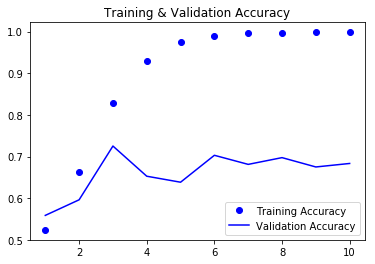

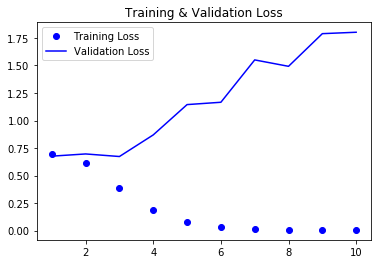

In [4]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training & Validation Loss')
plt.legend()

plt.show()

Next, we will move onto the LSTM implementation of a Recurrent Neural Network. As you can see, the implementation is very similair to SimpleRNN, except we are swapping the multiple SimpleRNN layers for a single LSTM layer provided by keras.

In [5]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(x_train, y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 75s 4ms/step - loss: 0.5127 - acc: 0.7580 - val_loss: 0.3621 - val_acc: 0.8570
Epoch 2/10
20000/20000 [==============================] - 74s 4ms/step - loss: 0.2931 - acc: 0.8854 - val_loss: 0.2977 - val_acc: 0.8878
Epoch 3/10
20000/20000 [==============================] - 74s 4ms/step - loss: 0.2289 - acc: 0.9138 - val_loss: 0.4875 - val_acc: 0.8552
Epoch 4/10
20000/20000 [==============================] - 74s 4ms/step - loss: 0.2035 - acc: 0.9240 - val_loss: 0.3748 - val_acc: 0.8810
Epoch 5/10
20000/20000 [==============================] - 75s 4ms/step - loss: 0.1719 - acc: 0.9373 - val_loss: 0.3707 - val_acc: 0.8802
Epoch 6/10
20000/20000 [==============================] - 75s 4ms/step - loss: 0.1601 - acc: 0.9414 - val_loss: 0.3872 - val_acc: 0.8842
Epoch 7/10
20000/20000 [==============================] - 75s 4ms/step - loss: 0.1433 - acc: 0.9496 - val_loss: 0.4985 - val_acc:

In the cell below, I am using matplotlib to plot the Training & Validation Accuracy for the Neural Network, as well as the Training & Validation Loss.

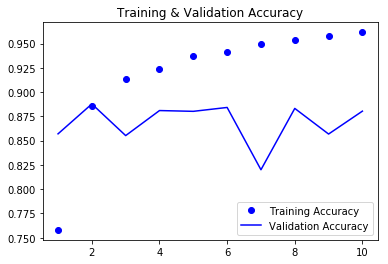

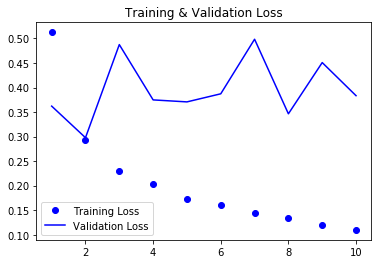

In [6]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training & Validation Loss')
plt.legend()

plt.show()